In [1]:
import tensorflow_datasets as tfds

In [3]:
print(len(tfds.list_builders()))

155


In [4]:
print(tfds.list_builders()[:5])

['abstract_reasoning', 'aeslc', 'aflw2k3d', 'amazon_us_reviews', 'arc']


In [8]:
celeba_bldr = tfds.builder('celeb_a')
print(celeba_bldr.info.features['attributes'].keys())

dict_keys(['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young'])


In [9]:
print(celeba_bldr.info.citation)

@inproceedings{conf/iccv/LiuLWT15,
  added-at = {2018-10-09T00:00:00.000+0200},
  author = {Liu, Ziwei and Luo, Ping and Wang, Xiaogang and Tang, Xiaoou},
  biburl = {https://www.bibsonomy.org/bibtex/250e4959be61db325d2f02c1d8cd7bfbb/dblp},
  booktitle = {ICCV},
  crossref = {conf/iccv/2015},
  ee = {http://doi.ieeecomputersociety.org/10.1109/ICCV.2015.425},
  interhash = {3f735aaa11957e73914bbe2ca9d5e702},
  intrahash = {50e4959be61db325d2f02c1d8cd7bfbb},
  isbn = {978-1-4673-8391-2},
  keywords = {dblp},
  pages = {3730-3738},
  publisher = {IEEE Computer Society},
  timestamp = {2018-10-11T11:43:28.000+0200},
  title = {Deep Learning Face Attributes in the Wild.},
  url = {http://dblp.uni-trier.de/db/conf/iccv/iccv2015.html#LiuLWT15},
  year = 2015
}



In [10]:
celeba_bldr.download_and_prepare()

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

Shuffling and writing examples to /root/tensorflow_datasets/celeb_a/2.0.0.incompleteW96E73/celeb_a-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/celeb_a/2.0.0.incompleteW96E73/celeb_a-validation.tfrecord


KeyboardInterrupt: ignored

In [ ]:
datasets = celeba_bldr.as_dataset(shuffle_files=False)
datasets.keys()

In [ ]:
ds_train = datasets['train']
assert is instance(ds_train, tf.data.Dataset)
example = next(iter(ds_train))
print(type(example))

In [11]:
mnist, mnist_info = tfds.load('mnist', with_info=True, shuffle_files=False)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead set
data_dir=gs://tfds-data/datasets.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.0. Subsequent calls will reuse this data.


In [12]:
print(mnist_info)

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.0,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)



In [13]:
print(mnist.keys())

dict_keys(['test', 'train'])


In [14]:
ds_train = mnist['train']
ds_train = ds_train.map(lambda item: (item['image'], item['label']))
ds_train = ds_train.batch(10)
batch = next(iter(ds_train))
print(batch[0].shape, batch[1])

(10, 28, 28, 1) tf.Tensor([4 1 0 7 8 1 2 7 1 6], shape=(10,), dtype=int64)


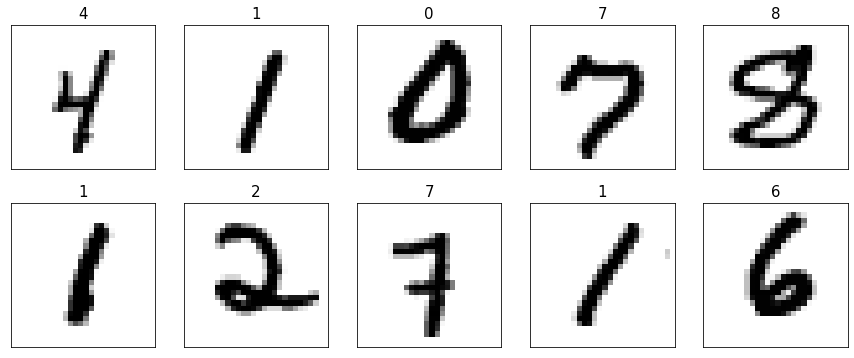

In [16]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 6))
for i, (image,label) in enumerate(zip(batch[0], batch[1])):
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image[:, :, 0], cmap='gray_r')
    ax.set_title('{}'.format(label), size=15)
plt.show()